In [183]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
#DATA_DIR = Path('..', 'data', 'final', 'public')
DATA_DIR = Path(Path.home(),'Documents','DrivenData','WarmUp_Heart_Disease','data')
print(DATA_DIR)

C:\Users\EG65685\Documents\DrivenData\WarmUp_Heart_Disease\data


In [185]:
# for training our model
train_values = pd.read_csv(DATA_DIR / 'Train_Values.csv', index_col='patient_id')
train_labels = pd.read_csv(DATA_DIR / 'Train_Labels.csv', index_col='patient_id')

In [186]:
train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [187]:
train_values.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

In [188]:
train_labels.head()

,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1
oyt4ek,0


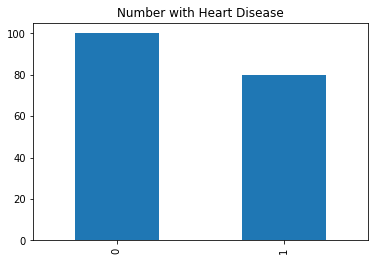

In [189]:
train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

In [206]:
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure',
                     'serum_cholesterol_mg_per_dl']
train_values_subset = train_values[selected_features]

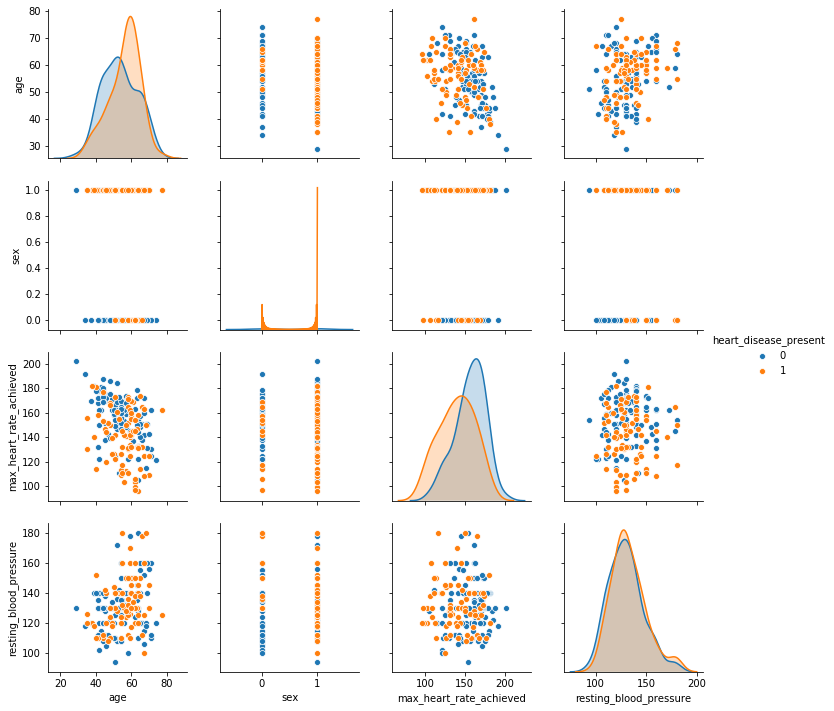

In [191]:
sns.pairplot(train_values.join(train_labels), 
             hue='heart_disease_present', 
             vars=selected_features)

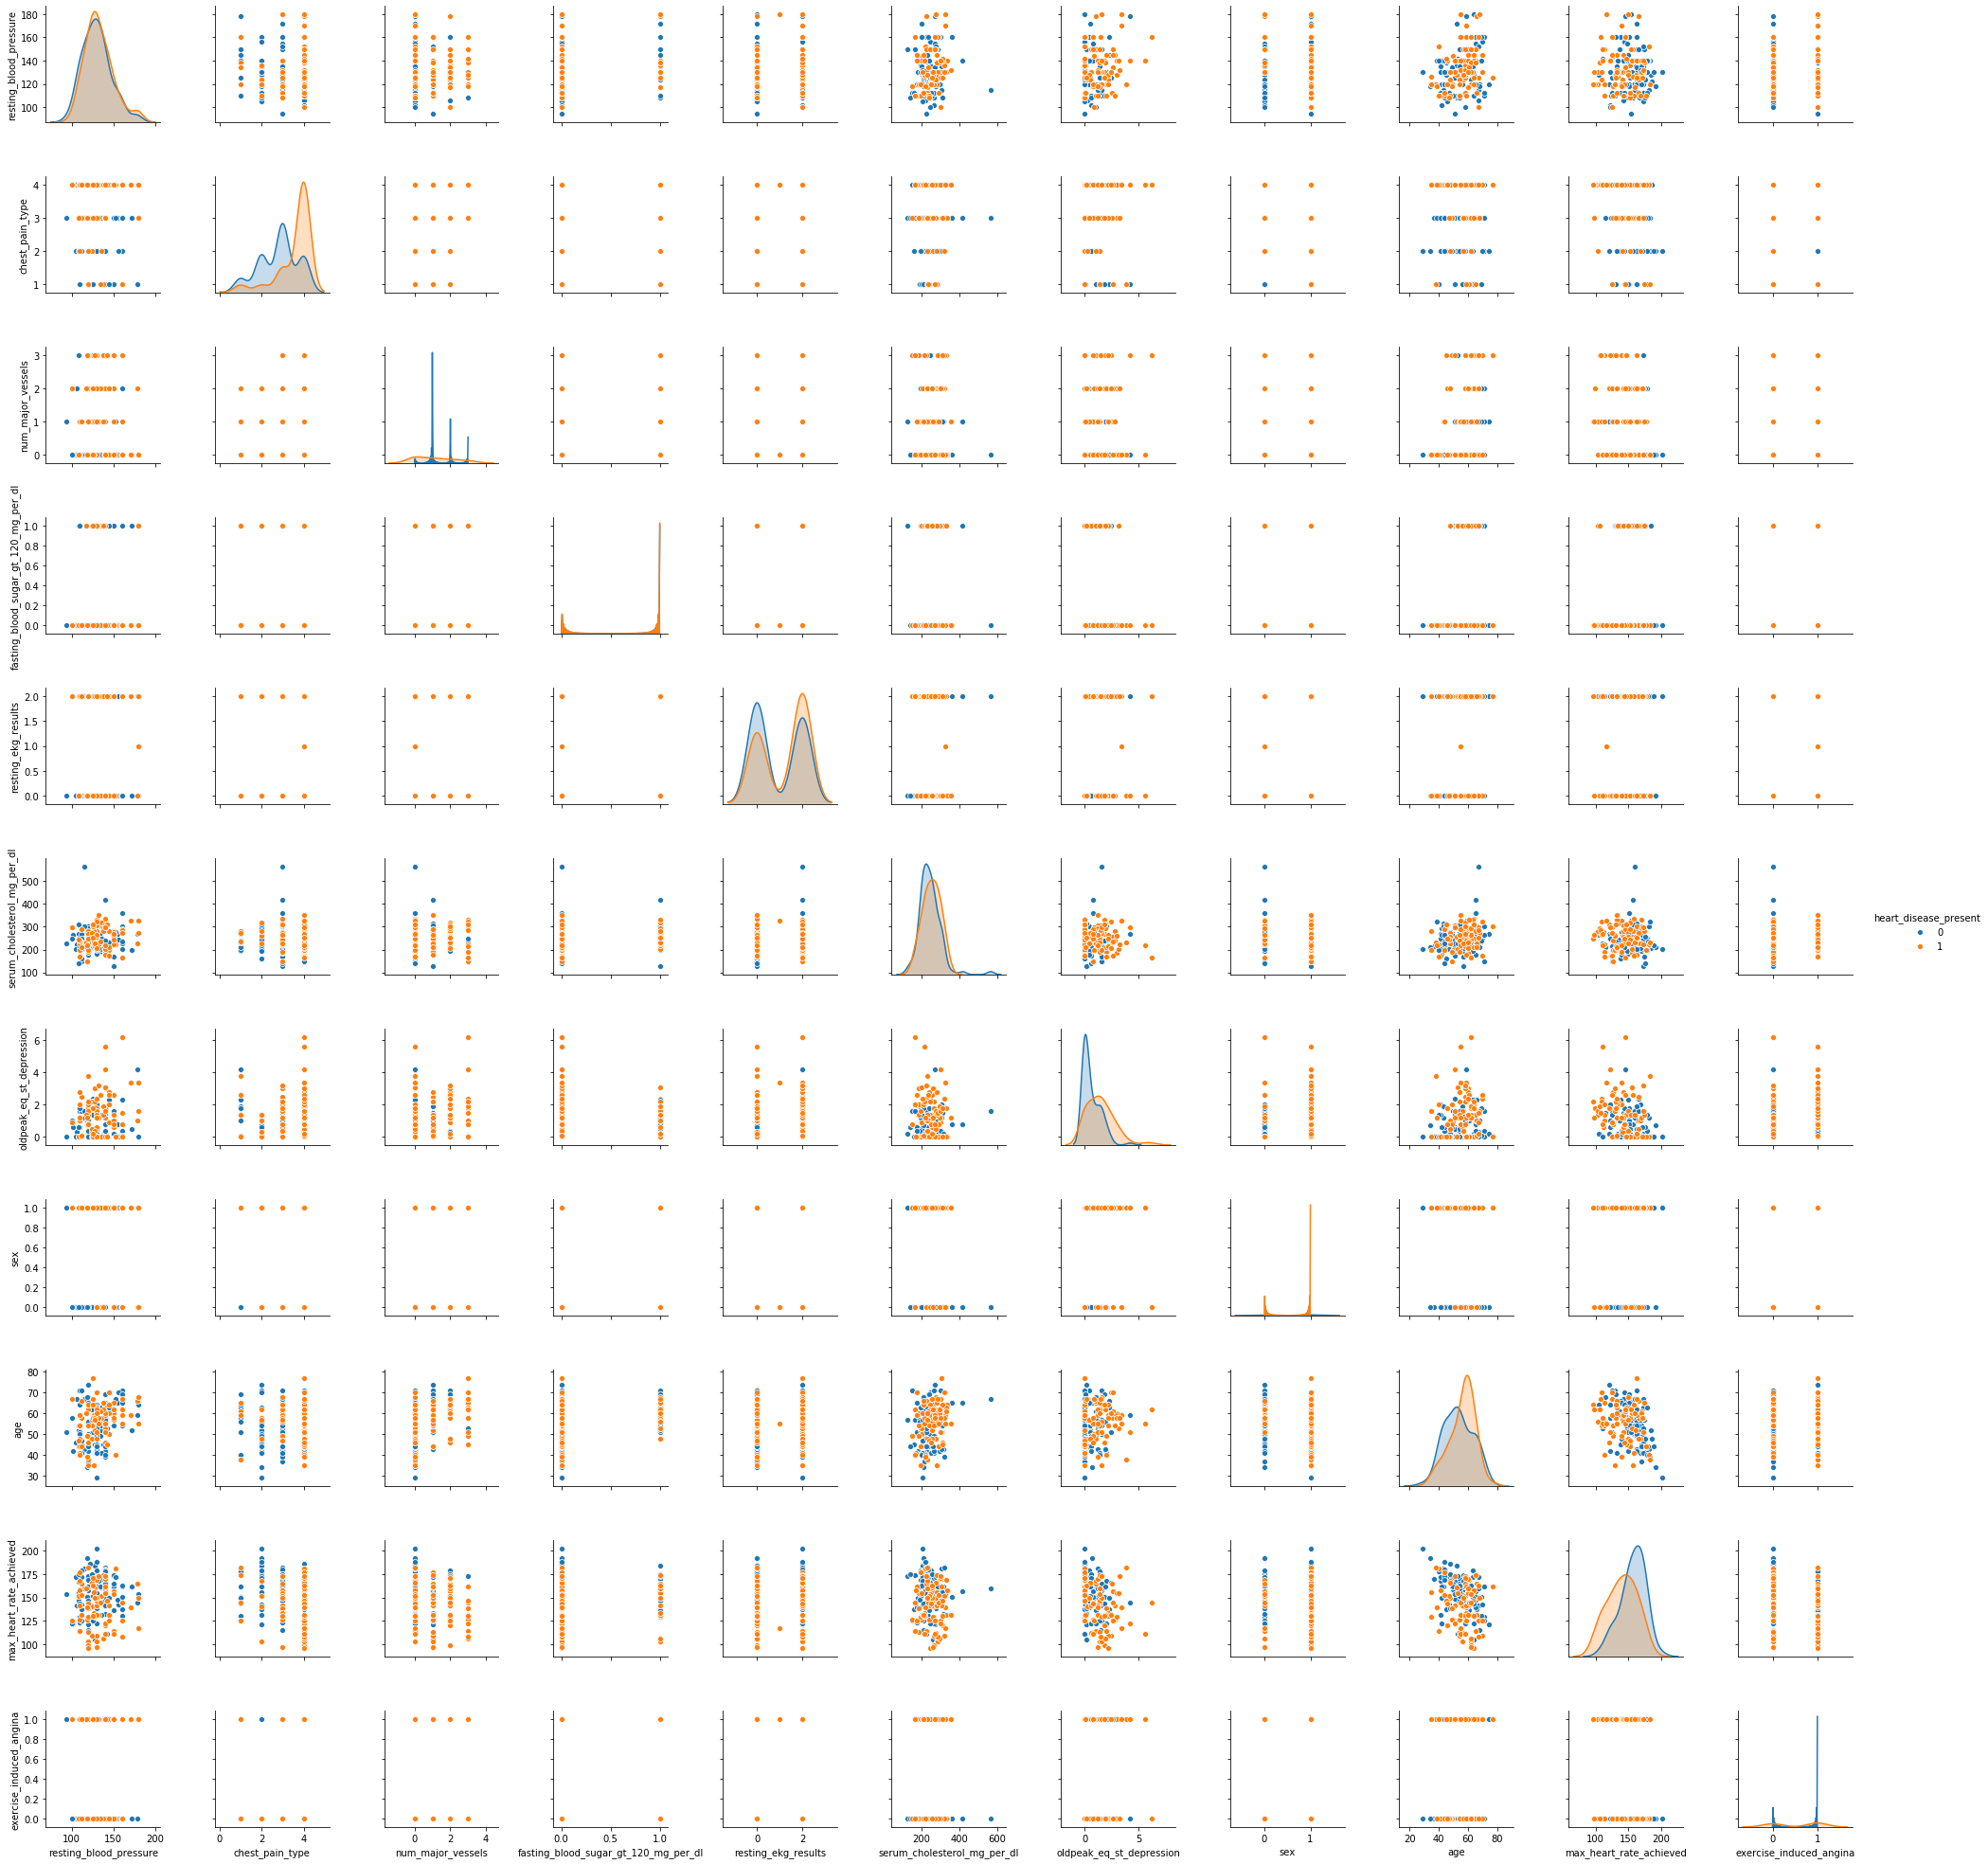

In [216]:
sns.pairplot(train_values.join(train_labels), 
             hue='heart_disease_present', 
             vars=train_values.columns[2:])

# Build the Model

In [192]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler

# the model
from sklearn.linear_model import LogisticRegression

# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [193]:
pipe = Pipeline(steps=[('scale', StandardScaler()), 
                       ('logistic', LogisticRegression())])
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [194]:
param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10], 
              'logistic__penalty': ['l1', 'l2']}
            #   'logistic__l1_ratio' : np.linspace(0,1,11) }
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  cv=3,scoring='neg_log_loss')

In [195]:
gs.fit(train_values_subset, train_labels.heart_disease_present)

C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\EG65685\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='

In [196]:
gs.best_params_
gs.score(train_values_subset, train_labels.heart_disease_present)

-0.5470155541205458

# Predict and submit

In [202]:
test_values = pd.read_csv(DATA_DIR / 'test_values.csv', index_col='patient_id')

test_values_subset = test_values[selected_features]

predictions = gs.predict_proba(test_values_subset)[:, 1]

submission_format = pd.read_csv(DATA_DIR / 'submission_format.csv', index_col='patient_id')

my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

my_submission.head()

In [203]:
my_submission.to_csv(DATA_DIR / 'submission_basic_log_reg.csv')

In [204]:
!head submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [205]:
# This scores a log loss of 0.53810